In [ ]:
import                                        numpy                             as             np
import                                        pandas                            as             pd
import                                        seaborn                           as             sns
import                                        matplotlib
import                                        matplotlib.pyplot                 as             plt
import                                        plotly.express                    as             px
import                                        sys
import                                        os
import                                        tensorflow                        as             tf
from      sklearn.preprocessing       import  OneHotEncoder

from      sklearn.impute              import  SimpleImputer
from      sklearn.preprocessing       import  StandardScaler
from      sklearn.model_selection     import  train_test_split
from      tensorflow.keras.models     import  Sequential
from      tensorflow.keras.callbacks  import  EarlyStopping
from      tensorflow.keras.optimizers import  Adam
from      tensorflow.keras.layers     import  InputLayer,Dense,Dropout,LSTM

# **Defining the settings**

In [ ]:
plt.rcParams.update({"font.family":"monospace"})

# **Reading the data**

In [ ]:
def reading_data(path):
  df=pd.read_csv(path)
  df.head(2)
  return df
if __name__=="__main__":
  path="/content/sample_data/cleaned_weather_data.csv"
  df=reading_data(path)

# **Data Preprocessing and cleaning**

In [ ]:
def data_cleaning(df,power_of_cell):
  GSTC=1000
  df["power"]=[ np.multiply(np.divide(rad,GSTC),power_of_cell)  for rad in df["solar_radiation_langley"].values]
  df.drop("site_id",axis=1,inplace=True)
  print(f"There are {df.isna().sum()} null values")
  print(f"shape of the data set is {df.shape}")
  print("Good to go!")
  print(df.info())
  return df
if __name__=="__main__":
  #power_of_cell=float(input("What should be the power of the cell? :"))
  df=data_cleaning(df,power_of_cell=20)

There are year                        0
julian_day                  0
day_length_seconds          0
precipitation_mm            0
solar_radiation_langley     0
snow_water_equivalent_mm    0
max_temp_celsius            0
min_temp_celsius            0
vapor_pressure_pa           0
max_temp_fahrenheit         0
min_temp_fahrenheit         0
power                       0
dtype: int64 null values
shape of the data set is (2173, 12)
Good to go!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2173 entries, 0 to 2172
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      2173 non-null   int64  
 1   julian_day                2173 non-null   int64  
 2   day_length_seconds        2173 non-null   int64  
 3   precipitation_mm          2173 non-null   int64  
 4   solar_radiation_langley   2173 non-null   float64
 5   snow_water_equivalent_mm  2173 non-null   int64  
 6   max_t

# **Explorary data analysis**

<ipython-input-82-3155717883>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=df,x="year",y=f"{item}",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{item}")
<ipython-input-82-3155717883>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=df,x="year",y=f"{item}",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{item}")
<ipython-input-82-3155717883>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=df,x="year",y=f"{double}",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{double}")
<ipython-input-82-3155717883>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=df,x="year",y=f"{item}",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{item}")
<ipython-input-82-3155717883>:18: FutureWarning: 

T

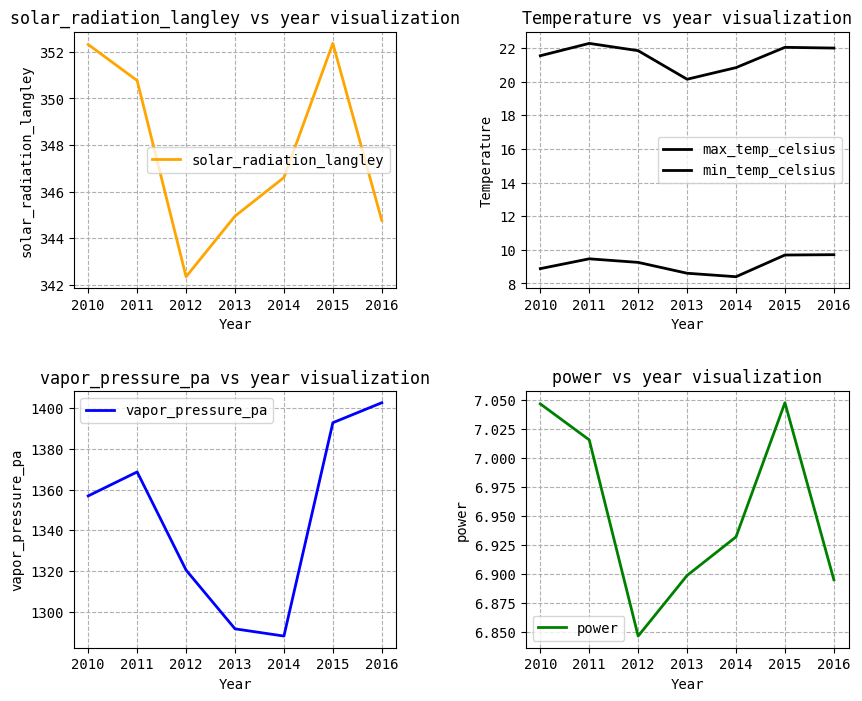

In [ ]:
def plotting(df,height,width,wspace,hspace):

  fig,axes=plt.subplots(2,2,figsize=(width,height))
  plt.subplots_adjust(wspace=wspace,hspace=hspace)
  axes=axes.flatten()
  items=["solar_radiation_langley","max_temp_celsius","vapor_pressure_pa","power"]
  colors=["orange","black","blue","green"]
  double="min_temp_celsius"
  for (index,item),col in zip(enumerate(items),colors):
    if index==1:
      ax=sns.lineplot(data=df,x="year",y=f"{item}",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{item}")
      ax=sns.lineplot(data=df,x="year",y=f"{double}",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{double}")
      ax.grid(True,linestyle="--")
      ax.set_xlabel("Year")
      ax.set_ylabel("Temperature")
      ax.set_title("Temperature vs year visualization")
    else:
      ax=sns.lineplot(data=df,x="year",y=f"{item}",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{item}")
      ax.grid(True,linestyle="--")
      ax.set_xlabel("Year")
      ax.set_ylabel(f"{item}")
      ax.set_title(f"{item} vs year visualization")

if __name__=="__main__":
  plotting(df,height=8,width=10,wspace=0.4,hspace=0.4)

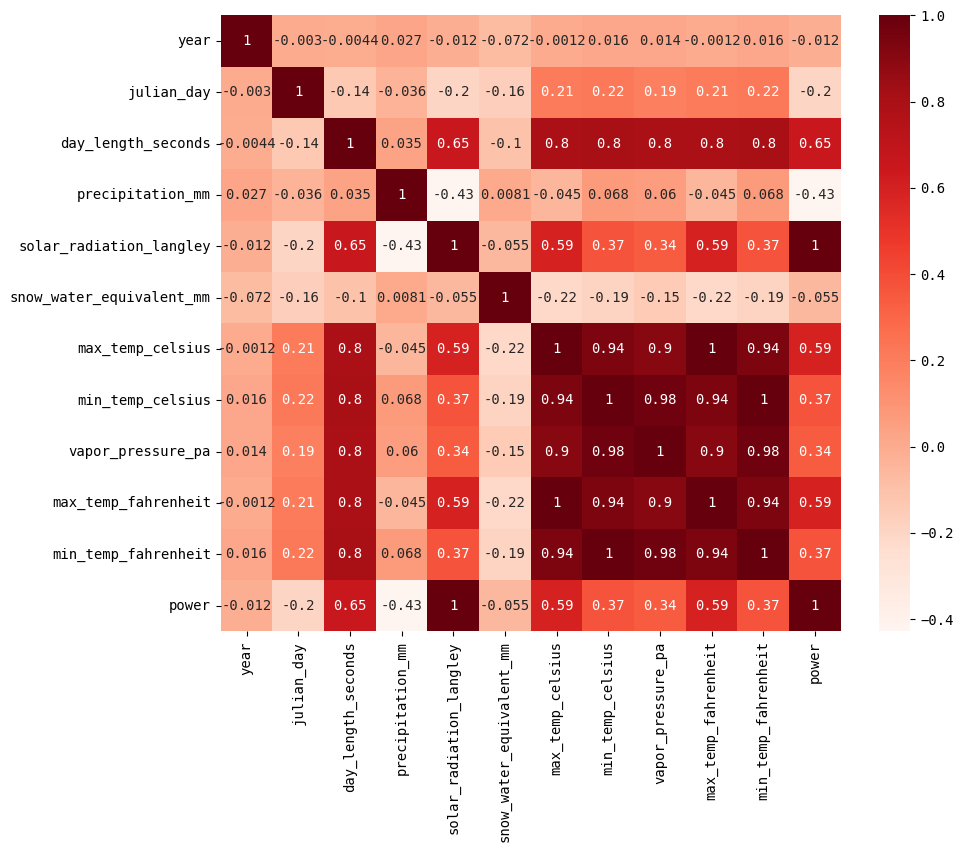

In [ ]:
def pairplot(df):
  plt.figure(figsize=(10,8))
  numerical_columns=df.select_dtypes(include=["number"]).columns.tolist()
  sns.heatmap(df[numerical_columns].corr(),cmap="Reds",annot=True)
  plt.show()

if __name__=="__main__":
  pairplot(df)

# **Our target column is going to be solar radiation so lets focus on this**

<ipython-input-84-966779733>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=df,x=f"{item}",y="solar_radiation_langley",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{item}")
<ipython-input-84-966779733>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=df,x=f"{item}",y="solar_radiation_langley",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{item}")
<ipython-input-84-966779733>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=df,x=f"{item}",y="solar_radiation_langley",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{item}")
<ipython-input-84-966779733>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=df,x=f"{item}",y="solar_radiation_langley",ax=axes[index],ci=None,linewidth=2,color=col,label

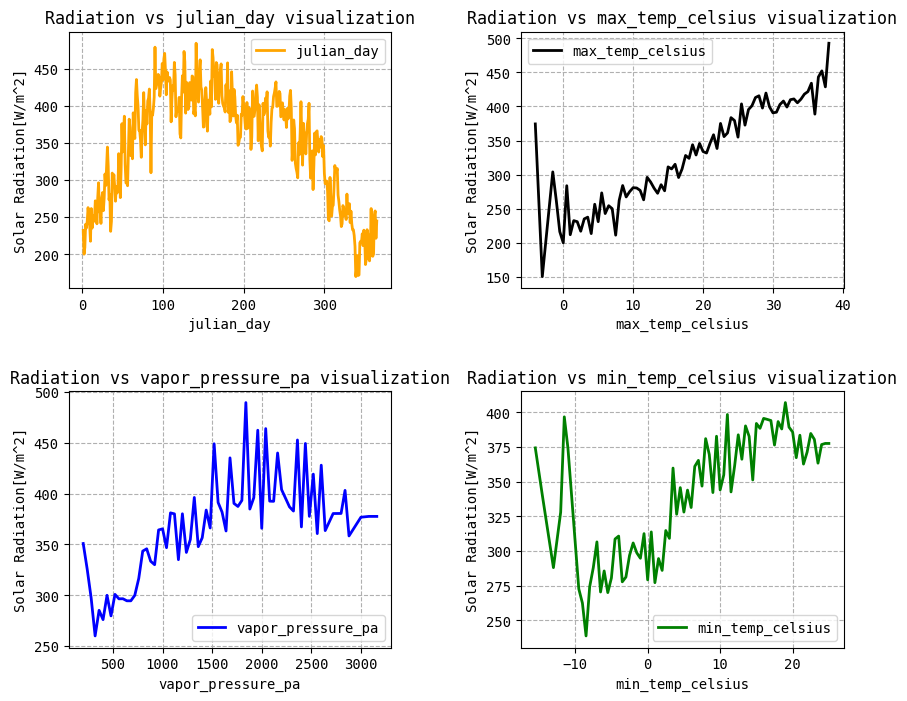

In [ ]:
def plotting_1(df,height,width,wspace,hspace):

  fig,axes=plt.subplots(2,2,figsize=(width,height))
  plt.subplots_adjust(wspace=wspace,hspace=hspace)
  axes=axes.flatten()
  items=["julian_day","max_temp_celsius","vapor_pressure_pa","min_temp_celsius"]
  colors=["orange","black","blue","green"]
  for (index,item),col in zip(enumerate(items),colors):
      ax=sns.lineplot(data=df,x=f"{item}",y="solar_radiation_langley",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{item}")
      ax.grid(True,linestyle="--")
      ax.set_xlabel(f"{item}")
      ax.set_ylabel("Solar Radiation[W/m^2]")
      ax.set_title(f"Radiation vs {item} visualization")


if __name__=="__main__":
  plotting_1(df,height=8,width=10,wspace=0.4,hspace=0.4)

<ipython-input-85-2500219639>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=df,x=f"{item}",y="solar_radiation_langley",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{item}")
<ipython-input-85-2500219639>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax=sns.lineplot(data=df,x=f"{item}",y="solar_radiation_langley",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{item}")


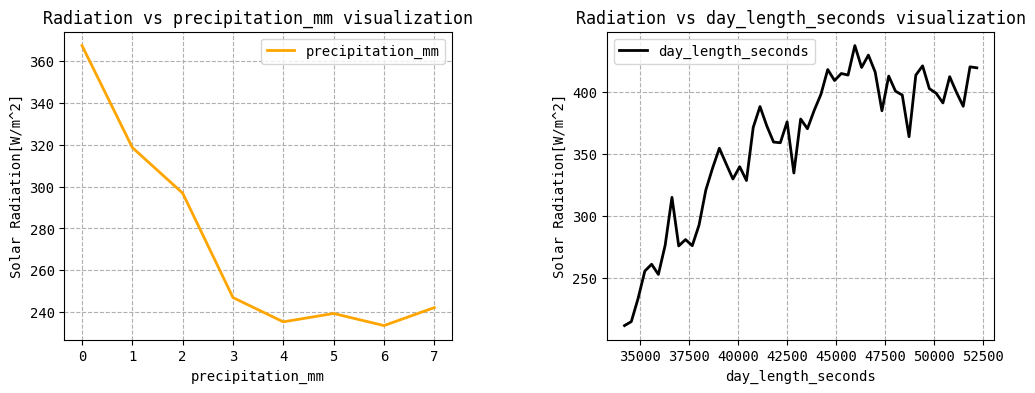

In [ ]:
def plotting_1(df,height,width,wspace,hspace):

  fig,axes=plt.subplots(1,2,figsize=(width,height))
  plt.subplots_adjust(wspace=wspace,hspace=hspace)
  axes=axes.flatten()
  items=["precipitation_mm","day_length_seconds"]
  colors=["orange","black"]
  for (index,item),col in zip(enumerate(items),colors):
      ax=sns.lineplot(data=df,x=f"{item}",y="solar_radiation_langley",ax=axes[index],ci=None,linewidth=2,color=col,label=f"{item}")
      ax.grid(True,linestyle="--")
      ax.set_xlabel(f"{item}")
      ax.set_ylabel("Solar Radiation[W/m^2]")
      ax.set_title(f"Radiation vs {item} visualization")


if __name__=="__main__":
  plotting_1(df,height=4,width=12,wspace=0.4,hspace=0.4)

# **Training session(Data Preprocessing)**

1.Dont need to encode data as no categorical columns

2.Need to scale data

3.Split data using train test split

4.set the target data


# **Splitting data in between train and test set**

In [ ]:
def splitting_data(target_col,split_size,df):


  index=df["year"]
  input_cols=[col for col in df.columns if col not in target_col]
  X=df[input_cols]
  y=df[target_col]

  X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=split_size,random_state=42,shuffle=True)
  print("X_train shape :",X_train.shape)
  print("y_train shape :",y_train.shape)
  print("X_test shape :",X_test.shape)
  print("y_test shape :",y_test.shape)

  return X_train,X_test,y_train,y_test,index


if __name__=="__main__":
  target_col=["solar_radiation_langley","power"]
  split_size=0.8
  X_train,X_test,y_train,y_test,index=splitting_data(target_col,split_size,df)

X_train shape : (1738, 10)
y_train shape : (1738, 2)
X_test shape : (435, 10)
y_test shape : (435, 2)


# **Scaling data**

In [ ]:
def scaling_data(X_train,X_test,y_train,y_test):
  X_scaler=StandardScaler()
  y_scaler=StandardScaler()

  X_train_scaled=pd.DataFrame(X_scaler.fit_transform(X_train),columns=X_train.columns)
  X_test_scaled=pd.DataFrame(X_scaler.transform(X_test),columns=X_test.columns)

  y_train_scaled=pd.DataFrame(y_scaler.fit_transform(y_train),columns=y_train.columns)
  y_test_scaled=pd.DataFrame(y_scaler.transform(y_test),columns=y_test.columns)


  return  X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled,X_scaler,y_scaler

if __name__=="__main__":
   X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled,X_scaler,y_scaler=scaling_data(X_train,X_test,y_train,y_test)


# **Model evaluation**

In [ ]:
def model_defining(X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled,layer_1,layer_2,layer_3,layer_4,dropout,learning_rate,patience,epochs):
  model=Sequential([
      InputLayer(shape=(X_train.shape[1],)),
      Dense(layer_1,activation="relu"),
      Dropout(dropout),
      Dense(layer_2,activation="relu"),
      Dropout(dropout),
      Dense(layer_3,activation="relu"),
      Dropout(dropout),
      Dense(layer_4,activation="relu"),
      Dense(2)
  ])


  optimizer=Adam(learning_rate=learning_rate)
  earlystopping=EarlyStopping(restore_best_weights=True,patience=patience)
  model.compile(optimizer=optimizer,loss=["mean_squared_error"],metrics=["mse"])



  history=model.fit(X_train_scaled,y_train_scaled,epochs=epochs,callbacks=[earlystopping],validation_data=[X_test_scaled,y_test_scaled])

  return history,model

if __name__=="__main__":
  layer_1=256
  layer_2=128
  layer_3=64
  layer_4=32
  dropout=0.2
  learning_rate=0.0001
  patience=20
  epochs=300
  history,model=model_defining(X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled,layer_1,layer_2,layer_3,layer_4,dropout,learning_rate,patience,epochs)



Epoch 1/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.9831 - mse: 0.9831 - val_loss: 0.8649 - val_mse: 0.8649
Epoch 2/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8540 - mse: 0.8540 - val_loss: 0.6814 - val_mse: 0.6814
Epoch 3/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6464 - mse: 0.6464 - val_loss: 0.4931 - val_mse: 0.4931
Epoch 4/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4914 - mse: 0.4914 - val_loss: 0.3454 - val_mse: 0.3454
Epoch 5/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3501 - mse: 0.3501 - val_loss: 0.2625 - val_mse: 0.2625
Epoch 6/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3024 - mse: 0.3024 - val_loss: 0.1995 - val_mse: 0.1995
Epoch 7/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2595 - mse: 0.2595 - val_loss: 0.1608 - val_mse: 0.1608
Epoch 8/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2254 - mse: 0.2254 - val_loss: 0.1365 - val_mse: 0.1365
Epoch 9/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.18

In [ ]:
def predicted_dataframe(X_test_scaled,y_test_scaled):
  act=pd.DataFrame(y_scaler.inverse_transform(y_test_scaled))
  pred=pd.DataFrame(y_scaler.inverse_transform(model.predict(X_test_scaled)))

  concated_data=pd.concat([act,pred],axis=1)
  concated_data.columns=["act_rad","act_power","pred_rad","pred_power"]
  return concated_data




if __name__=="__main__":
  concated_data=predicted_dataframe(X_test_scaled,y_test_scaled)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


<Axes: xlabel='None', ylabel='pred_rad'>

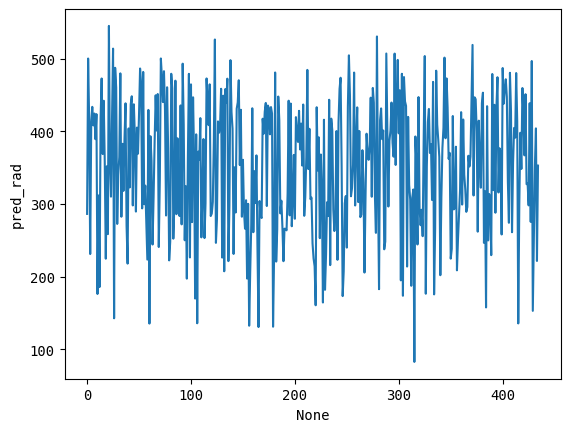

In [ ]:
sns.lineplot(data=concated_data,x=concated_data.index,y="pred_rad")
#sns.lineplot(data=concated_data,x=concated_data.index,y="act_rad")

<Axes: xlabel='None', ylabel='pred_power'>

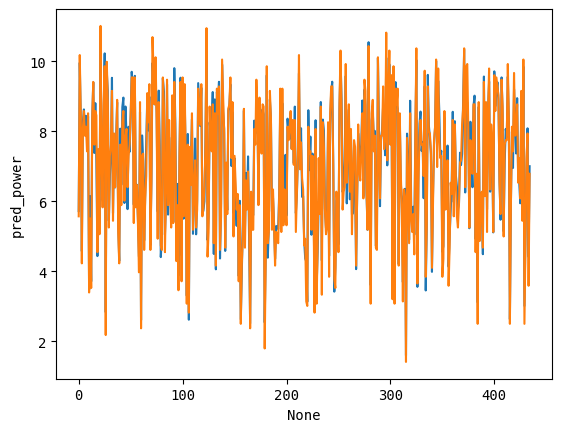

In [ ]:
sns.lineplot(data=concated_data,x=concated_data.index,y="pred_power")
sns.lineplot(data=concated_data,x=concated_data.index,y="act_power")